# The Sparks Foundation: GRIP- Data Science And Business Analytics         #September-October 2022#Task 4- Exploratory Data Analysis-Terrorism               #Author- Nesrine AZAIEZ

Perform Exploratory Data Analysis on the Global Terrorism Dataset.
Find out the hot zone of terrorism.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the csv file
data=pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1)')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
#info of Dataset
data.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region

In [4]:
#Shape of Dataset
data.shape

(181691, 135)

In [5]:
#Dataset Columns
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# data cleaning

In [6]:
# Checking the null velues in data
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [8]:
data.tail(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181681,201712310016,2017,12,31,NaN,0,NaN,160,Philippines,5,...,The victims included Senior Police Officer 4 M...,"""3 dead, scores injured in Mindanao blasts,"" M...","""Cop, 2 others killed in bomb blasts in Mindan...","""Cop killed, 7 injured in Maguindanao IED blas...",START Primary Collection,0,0,0,0,NaN
181682,201712310017,2017,12,31,NaN,0,NaN,98,Italy,8,...,NaN,"""Arson attack probed as racial crime,"" Ansa.it...","""Ascoli, a building destined for migrants goes...",NaN,START Primary Collection,-9,-9,0,-9,NaN
181683,201712310018,2017,12,31,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Six Members Of One Family Shot Dead In Faryab...","""Highlights: Pakistan Pashto Press 02 January ...",NaN,START Primary Collection,0,0,0,0,NaN
181684,201712310019,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Abducted PSO rescued within 11 hours,"" The Se...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181685,201712310020,2017,12,31,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""4 people injured in Farayb explosion,"" Pajhwo...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [9]:
#Renaming the necessary column
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','summary':'Summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapontype','target1':'Target','nkill':'Killed','nwound':'Wounded','motive':'Motive'},inplace=True)
data['Casualities']=data.Killed+data.Wounded
data=data[['Year','Month','Day','Country','Region','City','Latitude','Longitude','Attacktype','Targettype','Weapontype','Target','Group','Killed','Wounded','Casualities',]]

In [10]:
data

,Year,Month,Day,Country,Region,City,Latitude,Longitude,Attacktype,Targettype,Weapontype,Target,Group,Killed,Wounded,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,Julio Guzman,MANO-D,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,"Nadine Chaval, daughter",23rd of September Communist League,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Employee,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives,U.S. Embassy,Unknown,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,U.S. Consulate,Unknown,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,Military,Firearms,Checkpoint,Al-Shabaab,1.0,2.0,3.0
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,Military,Explosives,Hmeymim Air Base,Muslim extremists,2.0,7.0,9.0
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,Private Citizens & Property,Incendiary,Houses,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,0.0
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,Government (General),Explosives,Office,Unknown,0.0,0.0,0.0


# data exploratory

In [11]:
#Count Attacktype
attacks = data['Attacktype'].value_counts(dropna = False).sort_index()
attacks

Armed Assault                          42669
Assassination                          19312
Bombing/Explosion                      88255
Facility/Infrastructure Attack         10356
Hijacking                                659
Hostage Taking (Barricade Incident)      991
Hostage Taking (Kidnapping)            11158
Unarmed Assault                         1015
Unknown                                 7276
Name: Attacktype, dtype: int64

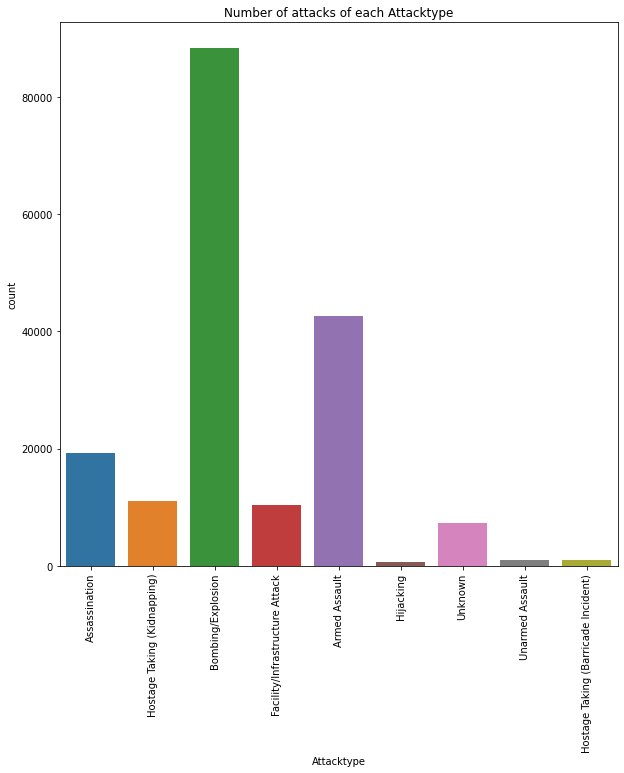

In [12]:
# Count of Terrorist Attack
plt.figure(figsize=(10,10))
sns.countplot(x='Attacktype',data=data)
plt.xticks(rotation=90)
plt.title('Number of attacks of each Attacktype')
plt.show()

In [13]:
# Year total - of attacks

year_attacks = data['Year'].value_counts(dropna = False).sort_index()
year_attacks




1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

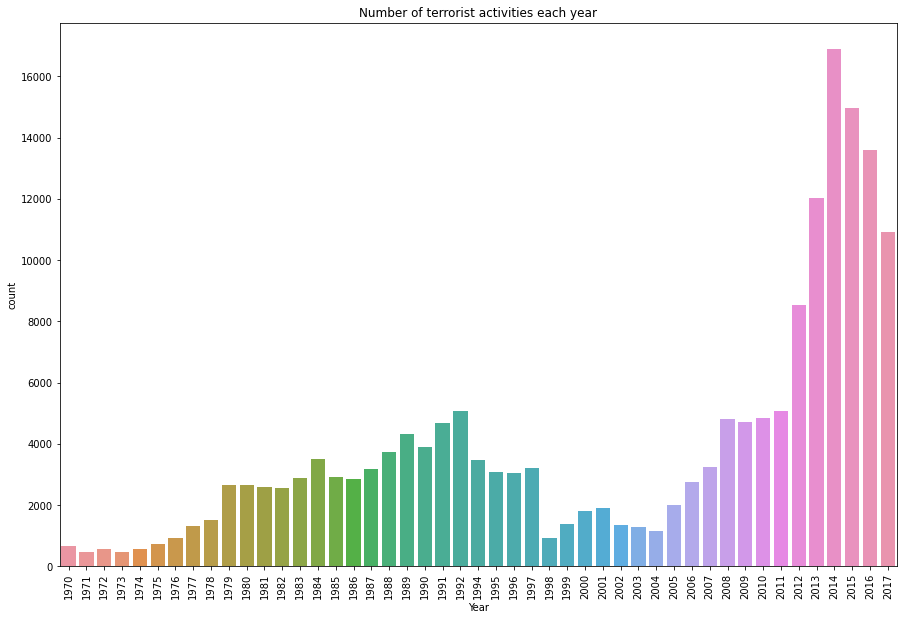

In [14]:
#Yearly Count of Terrorist Attack
plt.figure(figsize=(15,10))
sns.countplot(x='Year',data=data)
plt.xticks(rotation=90)
plt.title('Number of terrorist activities each year')
plt.show()

observation:the Year that had the most attacks was 2014

In [15]:
# Month total - of attacks

Month_attacks = data['Month'].value_counts(dropna = False).sort_index()
Month_attacks



0        20
1     14936
2     13879
3     15257
4     15152
5     16875
6     15359
7     16268
8     15800
9     14180
10    15563
11    14906
12    13496
Name: Month, dtype: int64

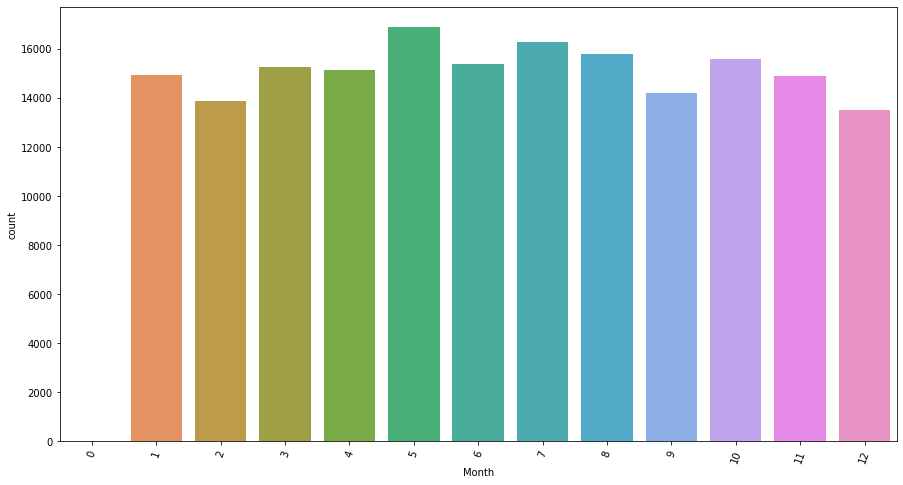

In [16]:
#Month affected by terrorist attack
data['Month'].value_counts()
plt.figure(figsize=(15,8))
sns.countplot(x='Month',data=data)
plt.xticks(rotation=70)
plt.show()

Observation:Month 5 is the month that  passed  the most attack

In [17]:
#count attrak in country
countries = data.Country.value_counts().head(20)
countries

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

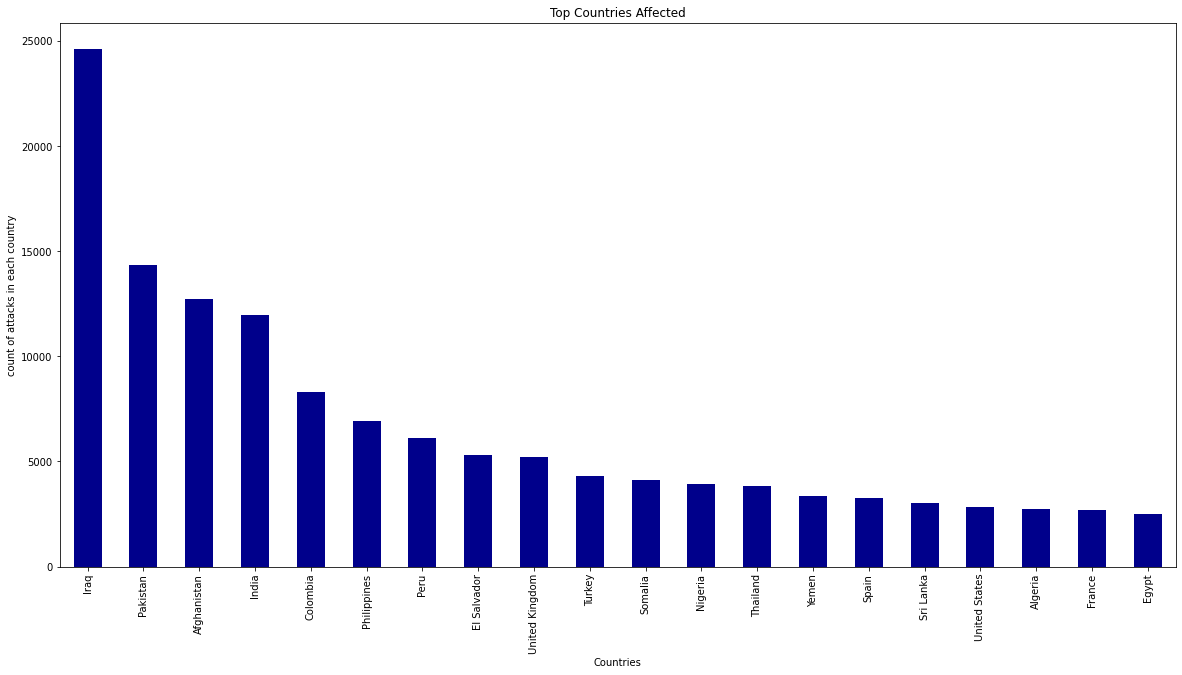

In [18]:
countries.plot(kind = "bar", color = "darkblue", figsize = (20,10))
plt.title("Top Countries Affected")
plt.xlabel("Countries")
plt.ylabel("count of attacks in each country")
plt.show()

Observation:Iraq is the Contry that  had  the most attracked

In [19]:
x = data.groupby('Country')['Killed'].sum().sort_values(ascending=False).head(20)
x

Country
Iraq                                78589.0
Afghanistan                         39384.0
Pakistan                            23822.0
Nigeria                             22682.0
India                               19341.0
Sri Lanka                           15530.0
Syria                               15229.0
Colombia                            14698.0
Peru                                12771.0
El Salvador                         12053.0
Algeria                             11066.0
Nicaragua                           10598.0
Somalia                             10273.0
Philippines                          9559.0
Yemen                                8776.0
Turkey                               6888.0
Guatemala                            5167.0
Russia                               4308.0
Burundi                              4205.0
Democratic Republic of the Congo     4069.0
Name: Killed, dtype: float64

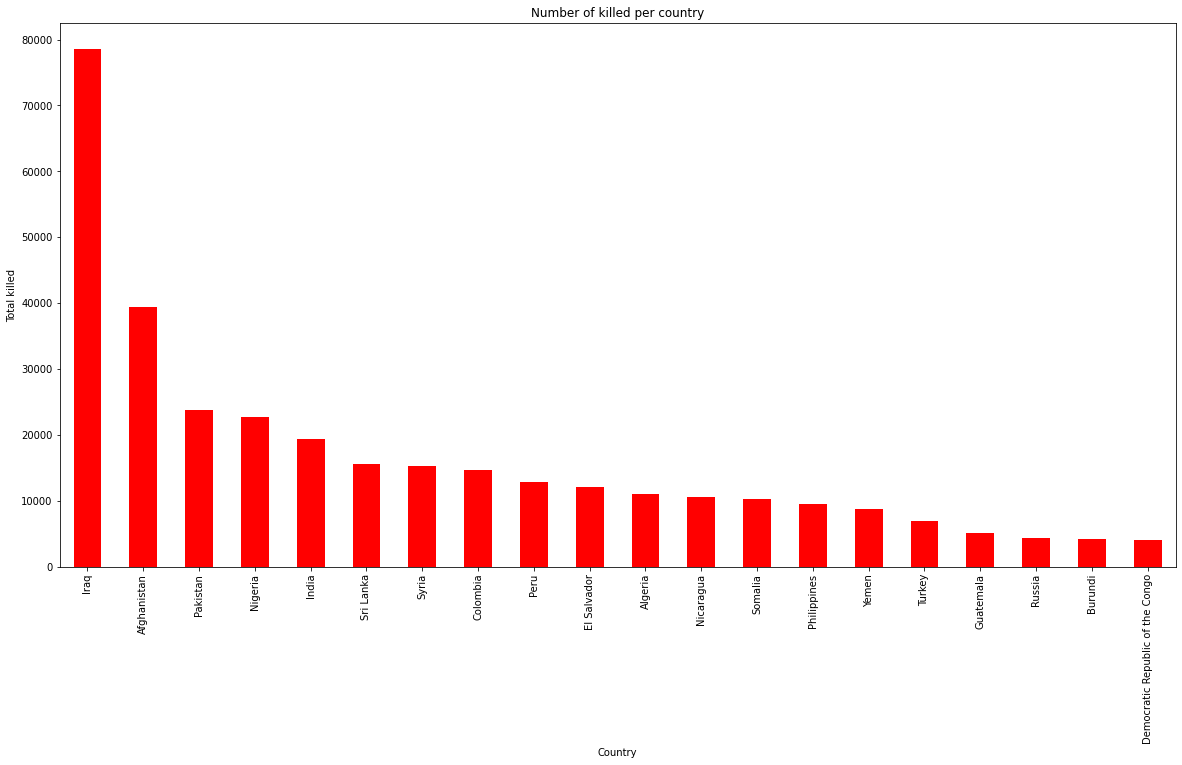

In [20]:
#Plot Killed Data

x.plot(kind = "bar", color = "red", figsize = (20,10))
plt.title("Number of killed per country")
plt.xlabel("Country")
plt.ylabel("Total killed")
plt.show()

Observation: Iraq is the country that has had the most killed

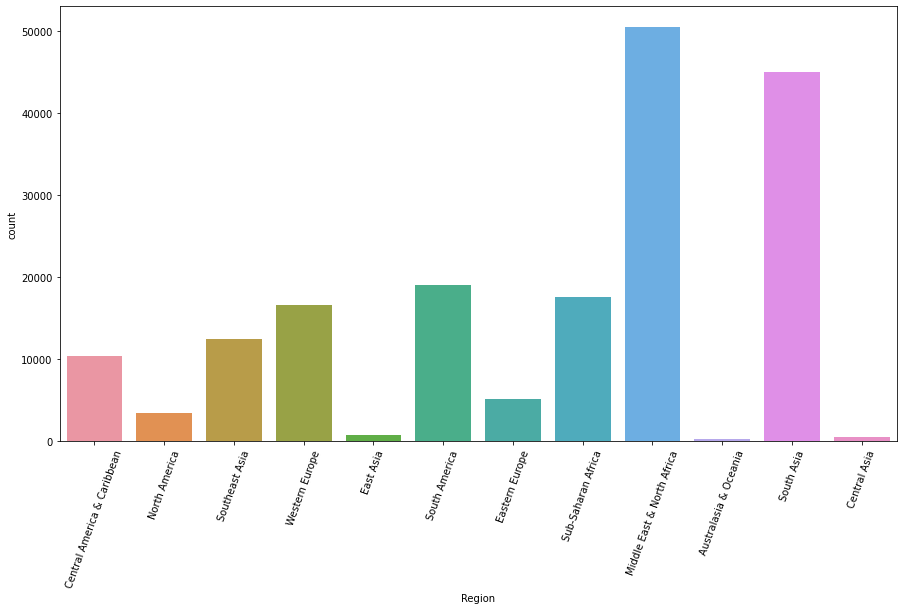

In [21]:
#Region affected by terrorist attack
data['Region'].value_counts()
plt.figure(figsize=(15,8))
sns.countplot(x='Region',data=data)
plt.xticks(rotation=70)
plt.show()

Observation: Middle East & North Africa is the region that has had the most attrack

In [22]:
#count attrak in Region
Region = data.Region.value_counts().head(20)
Region

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [23]:
#Region Killed

Region_Kill = data[["Region", "Killed"]].groupby("Region").sum().sort_values(by ='Killed', ascending =False).head(10)
Region_Kill

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


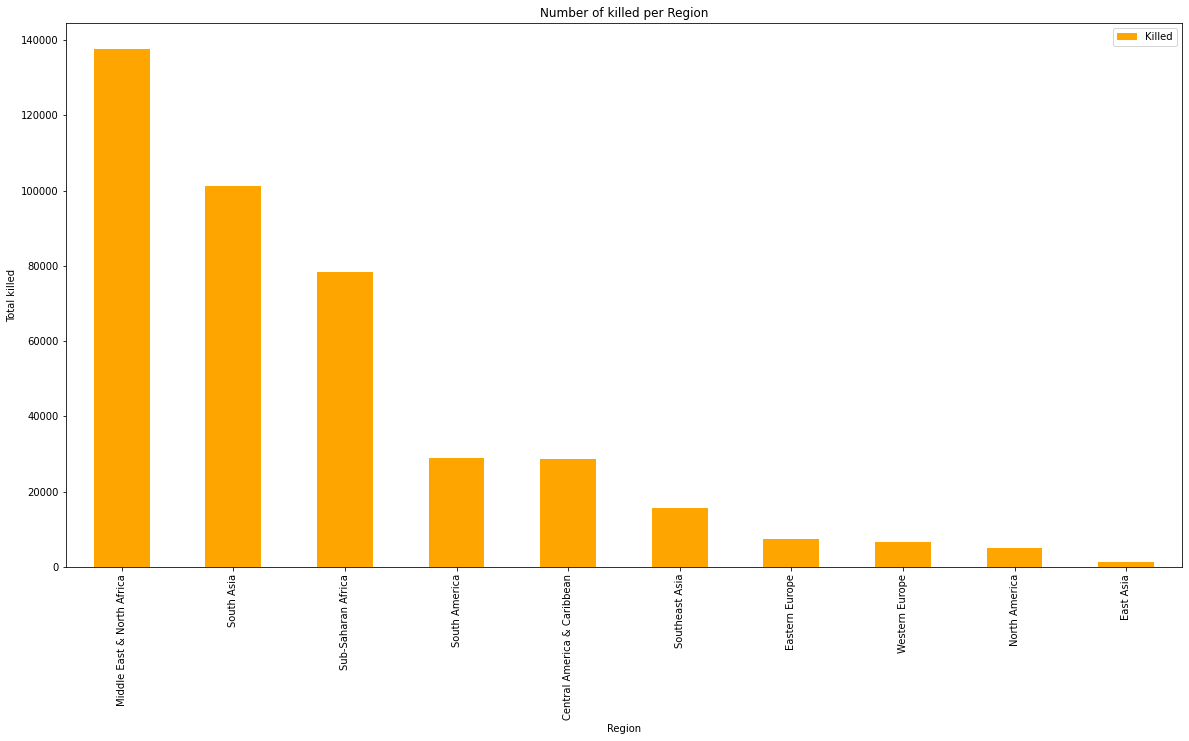

In [24]:
#Plot Killed Data

Region_Kill.plot(kind = "bar", color = "orange", figsize = (20,10))
plt.title("Number of killed per Region")
plt.xlabel("Region")
plt.ylabel("Total killed")
plt.show()

Observation: Middle East & North Africa is the region that  had the most killed

In [25]:
#count attrak in City
City = data.City.value_counts()[1:21]
City

Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Kabul              738
Name: City, dtype: int64

In [26]:
#Region Killed

City_Kill = data[["City", "Killed"]].groupby("City").sum().sort_values(by ='Killed', ascending =False)[1:21]
City_Kill

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


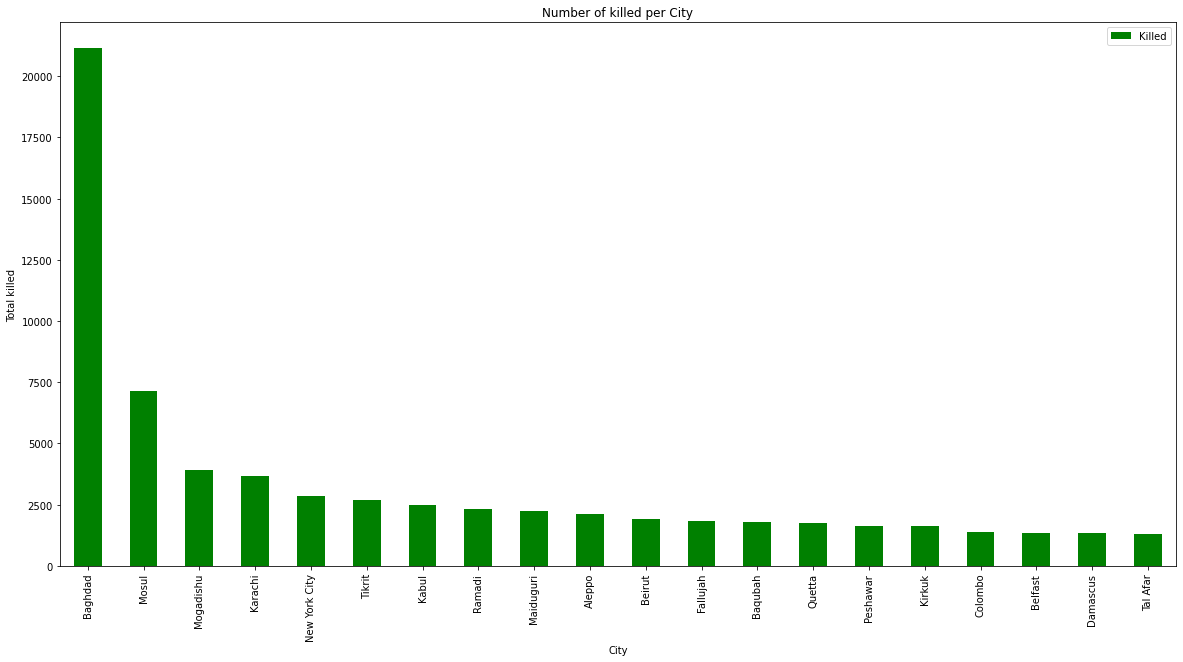

In [27]:
#Plot Killed Data

City_Kill.plot(kind = "bar", color = "green", figsize = (20,10))
plt.title("Number of killed per City")
plt.xlabel("City")
plt.ylabel("Total killed")
plt.show()

In [28]:
Grp = data.Group.value_counts()[1:20]
Grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

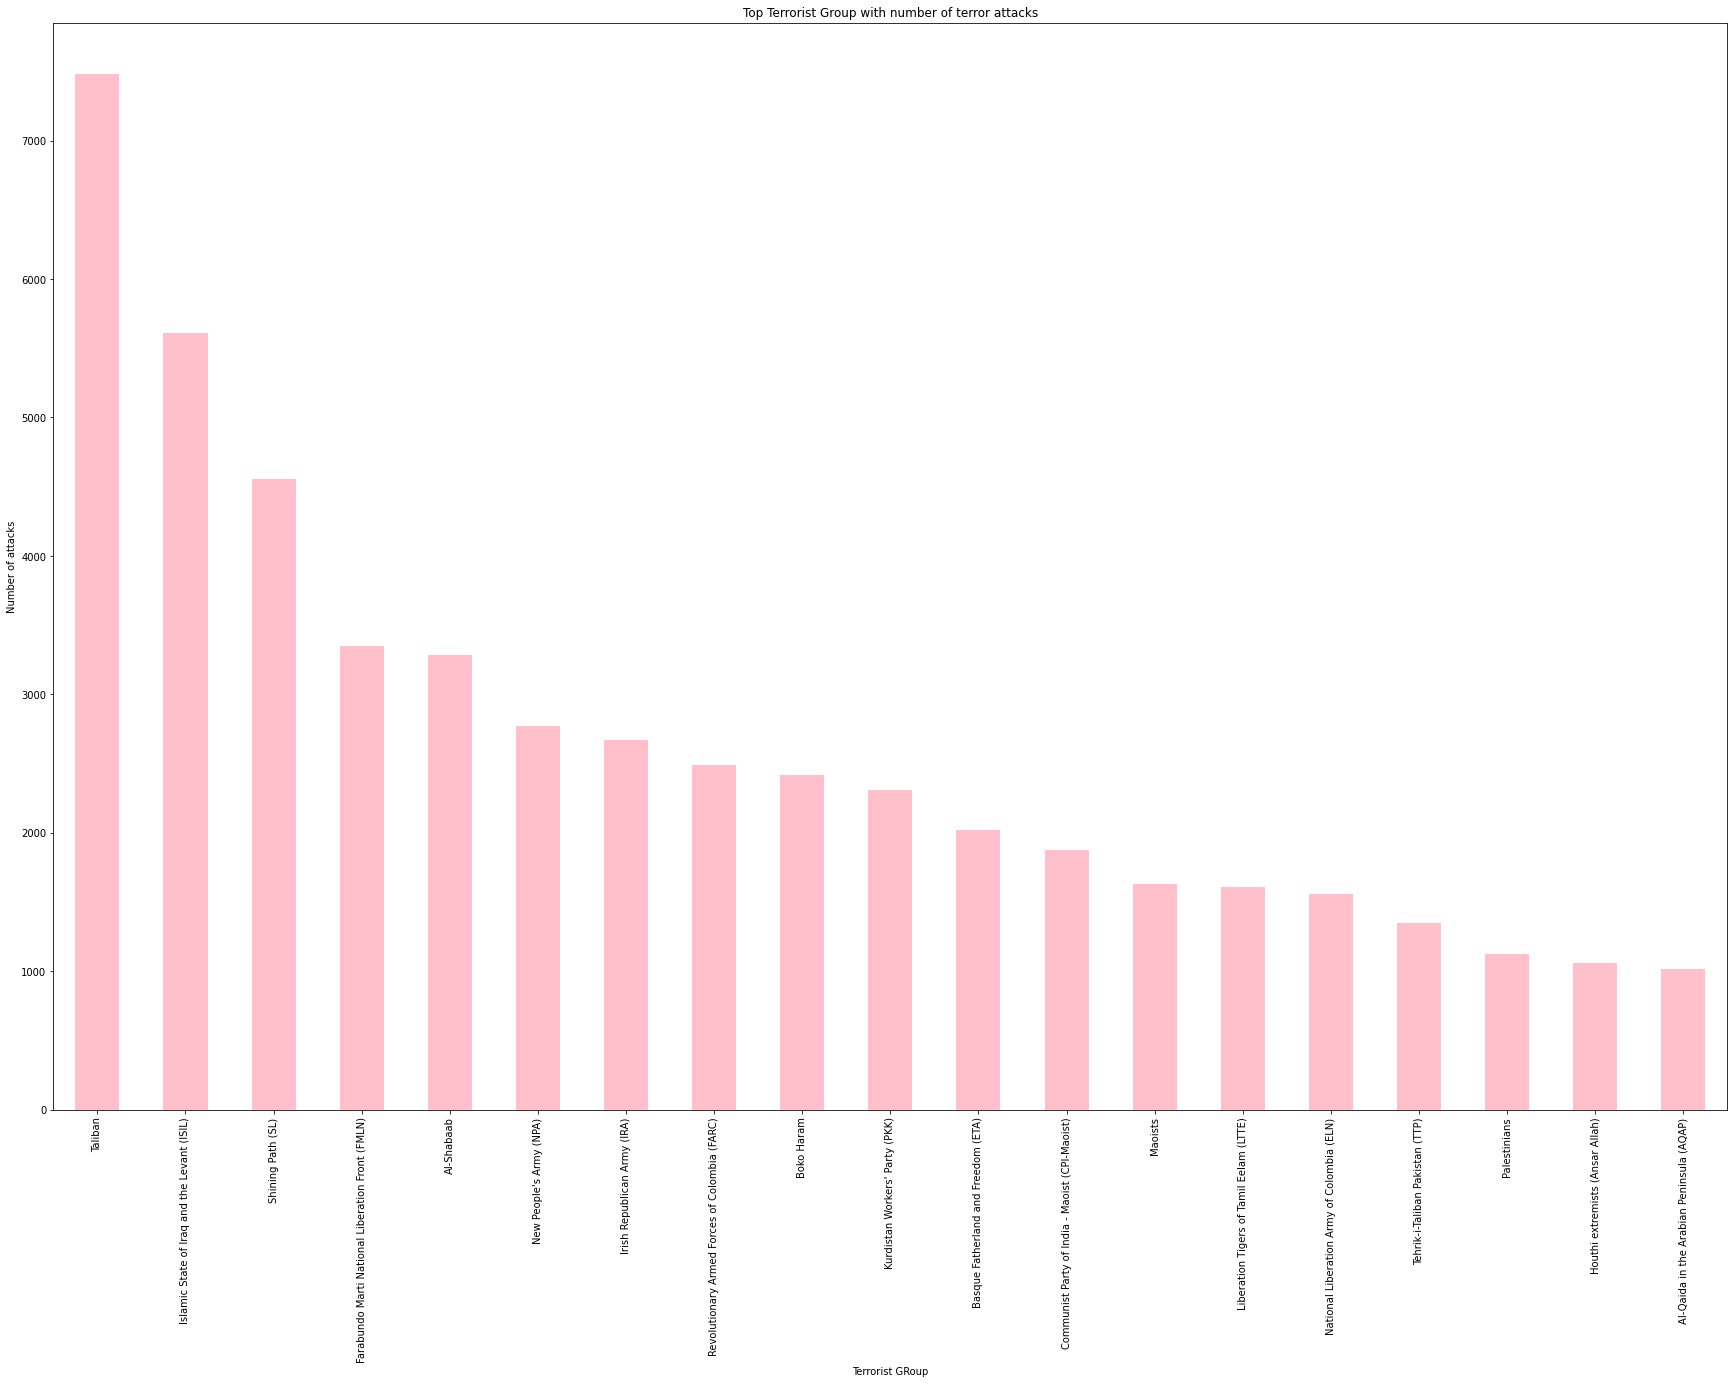

In [29]:
Grp.plot(kind = "bar", color = "pink", figsize = (30,20))
plt.title("Top Terrorist Group with number of terror attacks")
plt.xlabel("Terrorist GRoup")
plt.ylabel("Number of attacks")
plt.show()

# conclusion

In [31]:
print("Country with the most attacks:",data['Country'].value_counts().idxmax())
print("City with the most attacks:",data['City'].value_counts().index[1]) 
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Group with the most attacks:",data['Group'].value_counts().index[1])
print("Most Attack Types:",data['Attacktype'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion
